<a href="https://colab.research.google.com/github/JihoonCh/Object-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolov5 이미지 객체 탐지

### YOLOv5 모델을 로드하고 Roboflow에서 제공하는 데이터를 사용하여 사무용품을 감지합니다.

In [ ]:
!pip install torch torchvision torchaudio
!pip install pyyaml==5.3.1
!pip install roboflow
!pip install opencv-python-headless
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 repository 클론
%cd yolov5
!pip install -r requirements.txt

  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="your-api-key")
project = rf.workspace("geethaka").project("office-space")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Office-Space-2 in yolov5pytorch:: 100%|██████████| 778/778 [00:00<00:00, 7182.83it/s]


In [ ]:
# 학습을 시작합니다. --data 파라미터에 다운로드한 데이터셋의 경로를 지정합니다.
!python train.py --img 640 --batch 16 --epochs 10 --data /content/yolov5/Office-Space-2/data.yaml --weights yolov5s.pt --cache


[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
2024-06-29 11:58:22.764051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 11:58:22.764107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 11:58:22.765494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Office-Space-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, 

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/Office-Space-2/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/객체탐지.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/객체탐지.jpg: 640x480 1 case, 1 laptop, 1 mug, 1 plant, 76.9ms
Speed: 0.7ms pre-process, 76.9ms inference, 984.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


# Yolov5 동영상 객체 탐지

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/KakaoTalk_20240629_212224545.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/KakaoTalk_20240629_212224545.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/199) /content/KakaoTalk_20240629_212224545.mp4: 640x384 1 bag, 2 laptops, 49.9ms
video 1/1 (2/199) /content/KakaoTalk_20240629_212224545.mp4: 640x384 2 laptops, 8.2ms
video 1/1 (3/199) /content/KakaoTalk_20240629_212224545.mp4: 640x384 

# 허깅페이스 객체 탐지

In [ ]:
!pip install torch torchvision
!pip install transformers
!pip install opencv-python-headless
!pip install matplotlib

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


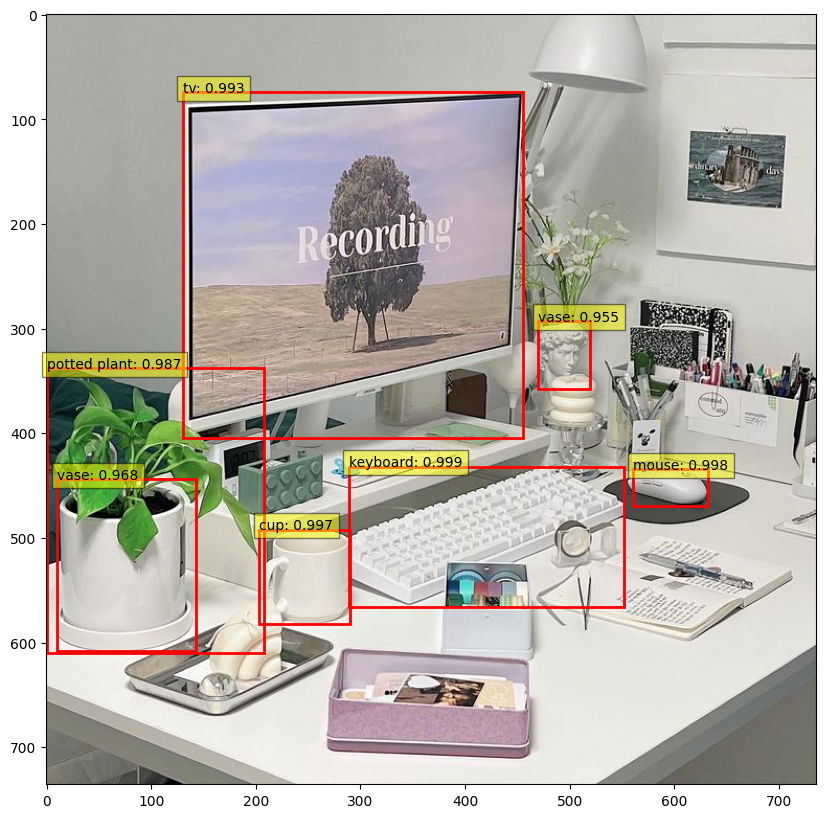

In [ ]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# 허깅페이스에서 모델을 로드합니다.
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

def detect_objects(image_path):
    # 이미지를 로드합니다.
    image = Image.open(image_path)

    # 이미지를 처리합니다.
    inputs = processor(images=image, return_tensors="pt")

    # 모델을 사용하여 예측을 수행합니다.
    outputs = model(**inputs)

    # 예측 결과를 처리합니다.
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # 결과를 시각화합니다.
    fig, ax = plt.subplots(1, figsize=(16, 10))
    ax.imshow(image)

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        ax.add_patch(patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='red', facecolor='none'))
        ax.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}", bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()

# 테스트할 이미지 경로를 지정합니다.
image_path = "/content/image3.jpg"
detect_objects(image_path)


# Gradio를 이용해 서비스 만들기

In [ ]:
!pip install torch torchvision
!pip install transformers
!pip install opencv-python-headless
!pip install matplotlib
!pip install gradio
!pip install timm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gradio as gr

# 허깅페이스에서 모델을 로드합니다.
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

def detect_objects(image):
    # 이미지를 처리합니다.
    inputs = processor(images=image, return_tensors="pt")

    # 모델을 사용하여 예측을 수행합니다.
    outputs = model(**inputs)

    # 예측 결과를 처리합니다.
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # 결과를 시각화합니다.
    fig, ax = plt.subplots(1, figsize=(16, 10))
    ax.imshow(image)

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        ax.add_patch(patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='red', facecolor='none'))
        ax.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}", bbox=dict(facecolor='yellow', alpha=0.5))

    # 결과 이미지를 저장합니다.
    output_image_path = "output.png"
    plt.axis('off')
    plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.0)
    plt.close(fig)

    return output_image_path

# Gradio 인터페이스 설정
def gradio_interface(image):
    return detect_objects(image)

# Gradio 인터페이스 정의
iface = gr.Interface(fn=gradio_interface, inputs=gr.Image(type="pil"), outputs="image", title="Object Detection", description="Upload an image to detect objects.")

# Gradio 인터페이스 실행
iface.launch()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://45e4cab7d07e390692.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
